In [1]:
# 1.1.1 Load data and check initial status
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\Administrator\Downloads\rep_ctis3\GHE_FULL_DD.csv")
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
DIM_COUNTRY_CODE             0
DIM_YEAR_CODE                0
DIM_GHECAUSE_TITLE           0
DIM_SEX_CODE                 0
VAL_DTHS_RATE100K_NUMERIC    0
dtype: int64


In [2]:
# 1.1.2 Handle missing values (0.000000 represents missing data in this dataset)
df['VAL_DTHS_RATE100K_NUMERIC'] = df['VAL_DTHS_RATE100K_NUMERIC'].replace(0.000000, np.nan)
df.dropna(subset=['VAL_DTHS_RATE100K_NUMERIC'], inplace=True)

In [3]:
# 1.1.3 Fix inconsistent formats
df['DIM_COUNTRY_CODE'] = df['DIM_COUNTRY_CODE'].str.upper()  # Standardize country codes
df['DIM_GHECAUSE_TITLE'] = df['DIM_GHECAUSE_TITLE'].str.title()  # Standardize cause names

In [5]:
# 1.1.4 Handle outliers using IQR method

Q1 = df['VAL_DTHS_RATE100K_NUMERIC'].quantile(0.25)
Q3 = df['VAL_DTHS_RATE100K_NUMERIC'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['VAL_DTHS_RATE100K_NUMERIC'] < (Q1 - 1.5 * IQR)) | 
          (df['VAL_DTHS_RATE100K_NUMERIC'] > (Q3 + 1.5 * IQR)))]

print("\nMissing values after cleaning:")
print(df.isnull().sum())



Missing values after cleaning:
DIM_COUNTRY_CODE             0
DIM_YEAR_CODE                0
DIM_GHECAUSE_TITLE           0
DIM_SEX_CODE                 0
VAL_DTHS_RATE100K_NUMERIC    0
dtype: int64


In [6]:
# 1.2.1 Filter for males and year 2021
df = df[(df['DIM_SEX_CODE'] == 'MLE') & (df['DIM_YEAR_CODE'] == 2021)]

In [7]:
# 1.2.2 Create pivot table for clustering analysis
pivot_df = df.pivot(index='DIM_COUNTRY_CODE', columns='DIM_GHECAUSE_TITLE', 
                   values='VAL_DTHS_RATE100K_NUMERIC').fillna(0)

In [8]:
# 1.2.3 Scale data for machine learning
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_df)

In [9]:
# 2.1.1 Basic statistics for all numerical columns
print("Basic Descriptive Statistics:")
print(df.describe())


Basic Descriptive Statistics:
       DIM_YEAR_CODE  VAL_DTHS_RATE100K_NUMERIC
count        13140.0               13140.000000
mean          2021.0                   3.060954
std              0.0                   4.213210
min           2021.0                   0.010000
25%           2021.0                   0.230000
50%           2021.0                   1.120000
75%           2021.0                   4.070000
max           2021.0                  18.610000


In [10]:
# 2.1.2 Calculate mean, median, and mode for death rates
death_rate_stats = {
    'Mean': df['VAL_DTHS_RATE100K_NUMERIC'].mean(),
    'Median': df['VAL_DTHS_RATE100K_NUMERIC'].median(),
    'Mode': df['VAL_DTHS_RATE100K_NUMERIC'].mode()[0]  # Taking first mode if multimodal
}

In [11]:
print("\nDeath Rate Statistics (per 100,000 males):")
for stat, value in death_rate_stats.items():
    print(f"{stat}: {value:.2f}")


Death Rate Statistics (per 100,000 males):
Mean: 3.06
Median: 1.12
Mode: 0.01


In [12]:
# 2.1.3 Statistics by country (top 5)
country_stats = df.groupby('DIM_COUNTRY_CODE')['VAL_DTHS_RATE100K_NUMERIC'].agg(['mean', 'median', lambda x: x.mode()[0]])
country_stats.columns = ['Mean', 'Median', 'Mode']
print("\nTop 5 Countries by Mean Death Rate:")
print(country_stats.sort_values('Mean', ascending=False).head(5))



Top 5 Countries by Mean Death Rate:
                      Mean  Median  Mode
DIM_COUNTRY_CODE                        
DNK               4.597812    1.89  0.08
VCT               4.489592    2.41  0.04
RUS               4.317000    1.99  0.01
GRD               4.270175    2.71  0.46
SOM               4.240405    1.95  0.01


In [13]:
# 2.1.4 Statistics by cause of death (top 5)
cause_stats = df.groupby('DIM_GHECAUSE_TITLE')['VAL_DTHS_RATE100K_NUMERIC'].agg(['mean', 'median', lambda x: x.mode()[0]])
cause_stats.columns = ['Mean', 'Median', 'Mode']
print("\nTop 5 Causes by Mean Death Rate:")
print(cause_stats.sort_values('Mean', ascending=False).head(5))


Top 5 Causes by Mean Death Rate:
                                   Mean  Median   Mode
DIM_GHECAUSE_TITLE                                    
Ischaemic Heart Disease       16.710000  16.565  15.53
Stroke                        13.407500  14.400   8.89
Lower Respiratory Infections  12.456102  13.480   8.32
Diabetes Mellitus             12.415833  13.035  11.29
Kidney Diseases               12.312842  12.740  12.62


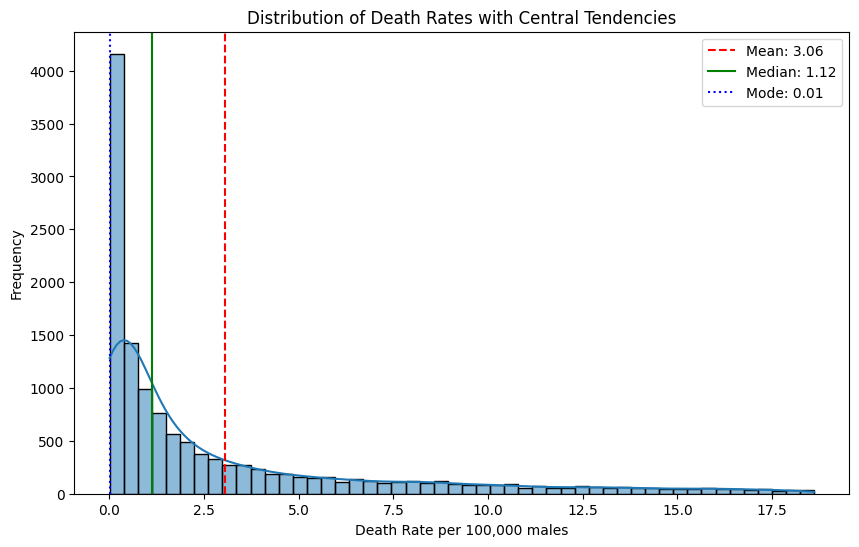

In [15]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# 2.1.5 Visual representation of central tendencies
plt.figure(figsize=(10, 6))
sns.histplot(df['VAL_DTHS_RATE100K_NUMERIC'], bins=50, kde=True)

plt.axvline(death_rate_stats['Mean'], color='r', linestyle='--', label=f"Mean: {death_rate_stats['Mean']:.2f}")
plt.axvline(death_rate_stats['Median'], color='g', linestyle='-', label=f"Median: {death_rate_stats['Median']:.2f}")
plt.axvline(death_rate_stats['Mode'], color='b', linestyle=':', label=f"Mode: {death_rate_stats['Mode']:.2f}")

plt.title('Distribution of Death Rates with Central Tendencies')
plt.xlabel('Death Rate per 100,000 males')
plt.ylabel('Frequency')
plt.legend()
plt.show()


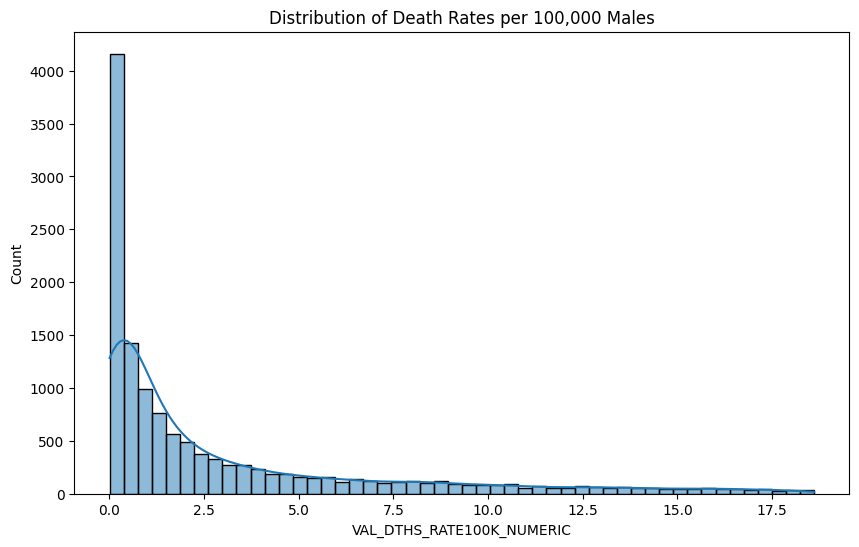

In [16]:
# 2.2.1 Distribution of death rates
plt.figure(figsize=(10, 6))
sns.histplot(df['VAL_DTHS_RATE100K_NUMERIC'], bins=50, kde=True)
plt.title('Distribution of Death Rates per 100,000 Males')
plt.show()

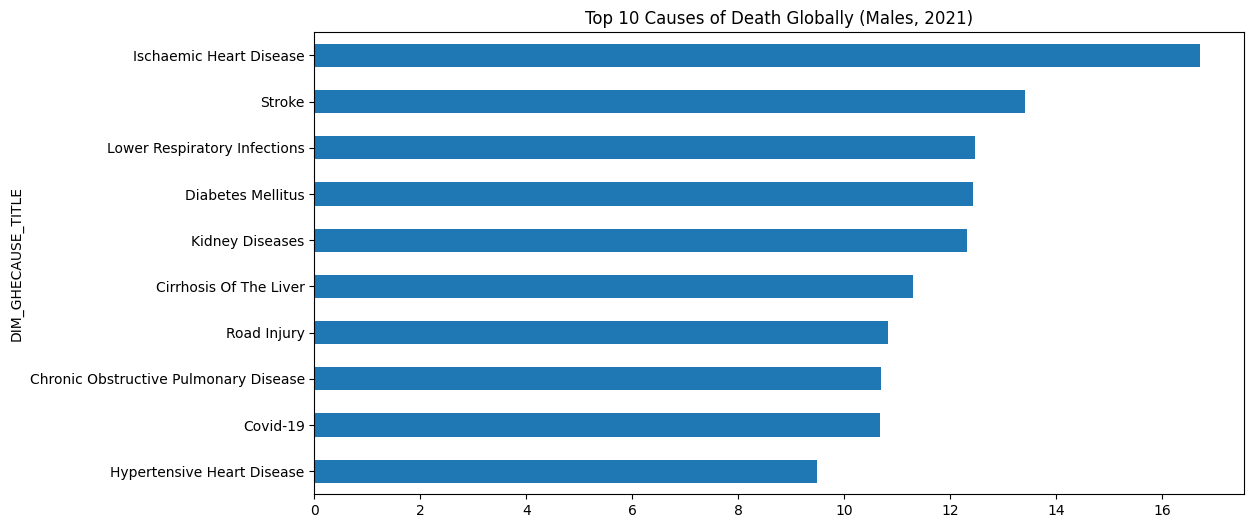

In [17]:
# 2.2.2 Top causes globally
top_causes = df.groupby('DIM_GHECAUSE_TITLE')['VAL_DTHS_RATE100K_NUMERIC'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_causes.plot(kind='barh')
plt.title('Top 10 Causes of Death Globally (Males, 2021)')
plt.gca().invert_yaxis()
plt.show()

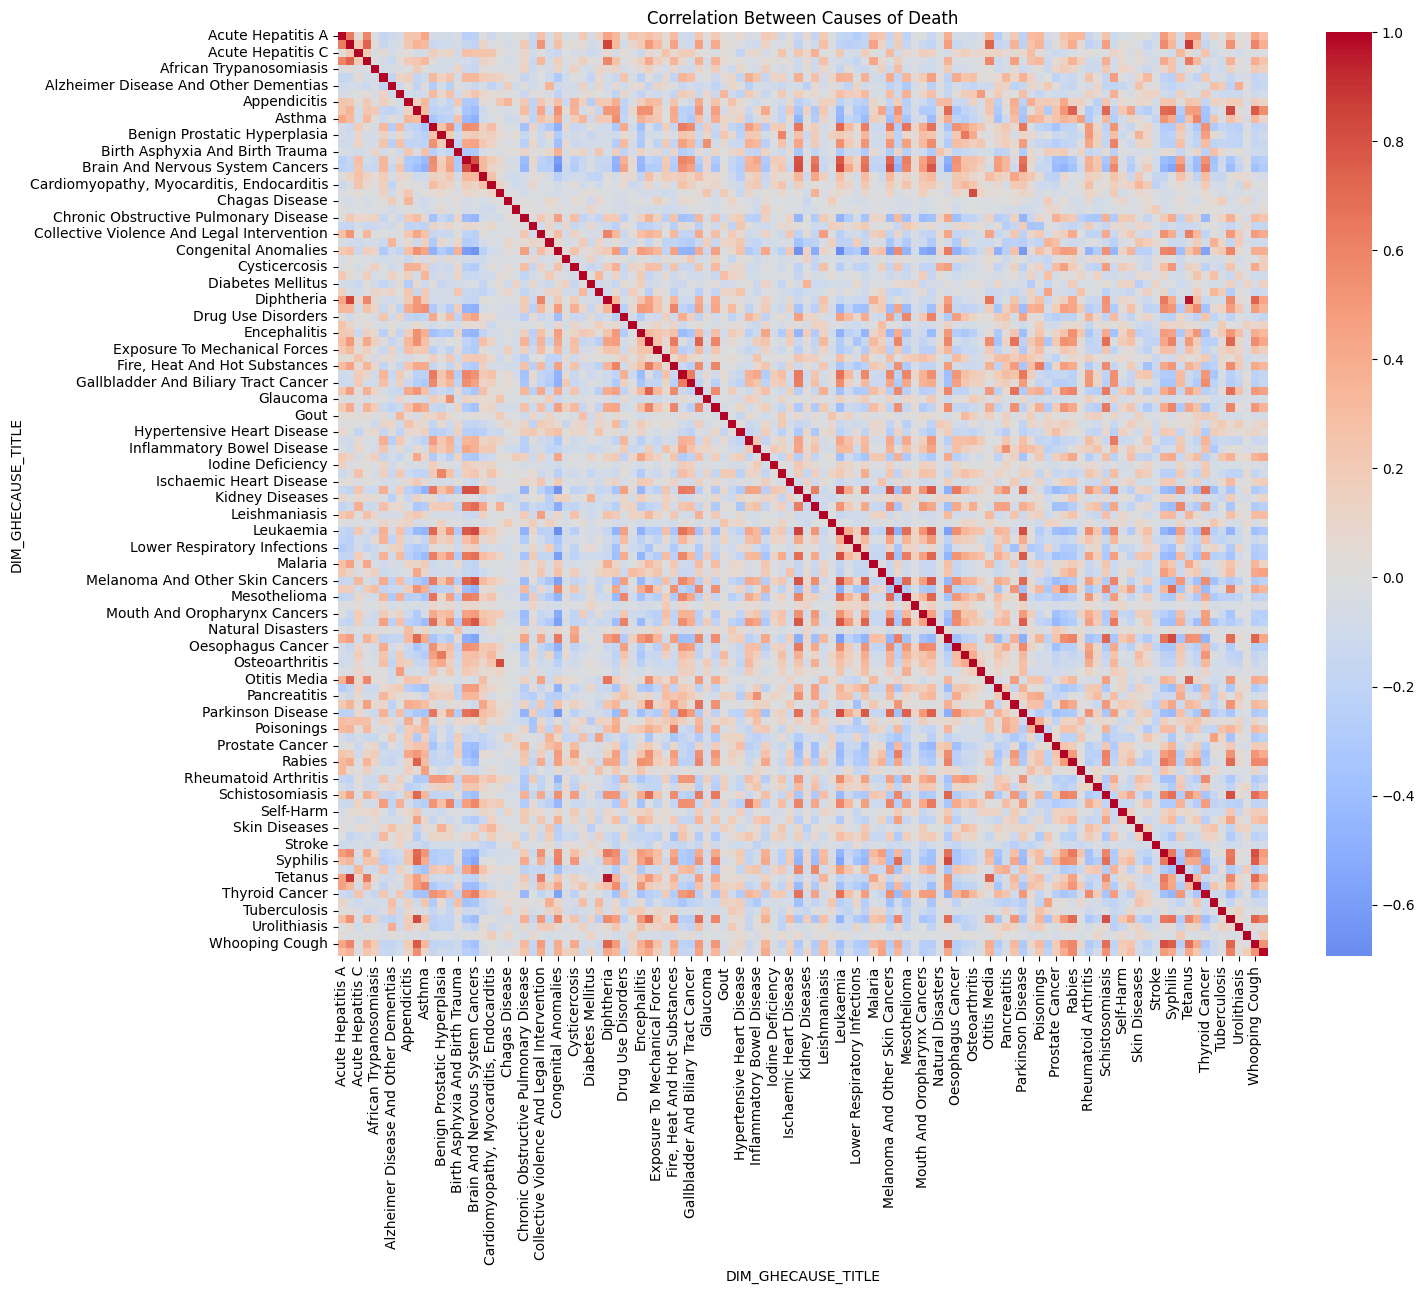

In [18]:
# 2.2.3 Correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(pivot_df.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Between Causes of Death')
plt.show()

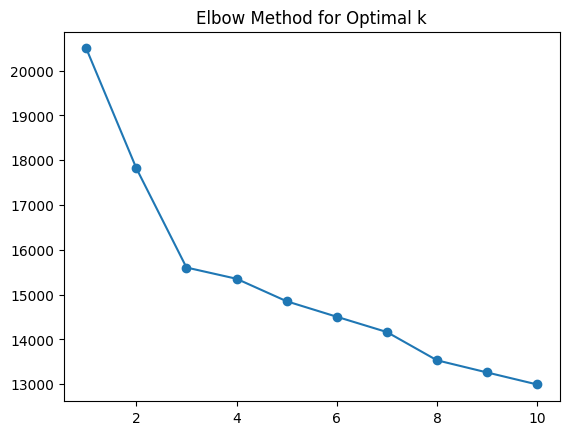

In [19]:
# Using K-Means clustering to group countries by similar mortality patterns
from sklearn.cluster import KMeans

# 3.1.1 Determine optimal clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.show()

In [20]:
# 3.2.1 Train with selected k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
pivot_df['Cluster'] = clusters

Silhouette Score: 0.143


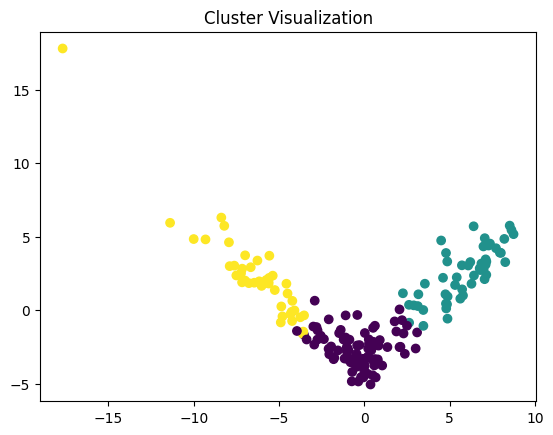


Cluster 0 countries:
['AFG', 'ALB', 'ARE', 'ATG', 'AZE']

Cluster 1 countries:
['ARG', 'ARM', 'AUS', 'AUT', 'BEL']

Cluster 2 countries:
['AGO', 'BDI', 'BEN', 'BFA', 'CAF']


In [21]:
from sklearn.metrics import silhouette_score

# 4.1 Silhouette score evaluation
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# 4.2 Visual evaluation with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.title('Cluster Visualization')
plt.show()

# 4.3 Interpret clusters
for cluster in sorted(pivot_df['Cluster'].unique()):
    print(f"\nCluster {cluster} countries:")
    print(pivot_df[pivot_df['Cluster'] == cluster].index.tolist()[:5])

In [24]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 5.1 Modular functions
def clean_data(filepath):
    """Load and clean the dataset"""
    df = pd.read_csv(filepath)
    # Example cleaning: drop NA values
    df = df.dropna()
    return df

def perform_eda(df):
    """Perform exploratory analysis"""
    # Example: Create a pivot table or subset of numeric columns
    numeric_df = df.select_dtypes(include='number')
    return numeric_df  # Returning clean numeric data for clustering

def train_model(data):
    """Train clustering model"""
    model = KMeans(n_clusters=3, random_state=42)
    clusters = model.fit_predict(data)
    return model, clusters

# 5.2 Main execution block
if __name__ == "__main__":
    data = clean_data(r"C:\Users\Administrator\Downloads\rep_ctis3\GHE_FULL_DD.csv")
    pivot_df = perform_eda(data)
    model, clusters = train_model(pivot_df)

    # Optional: print or visualize clusters
    print("Cluster assignments:", clusters)


Cluster assignments: [0 0 0 ... 0 0 0]


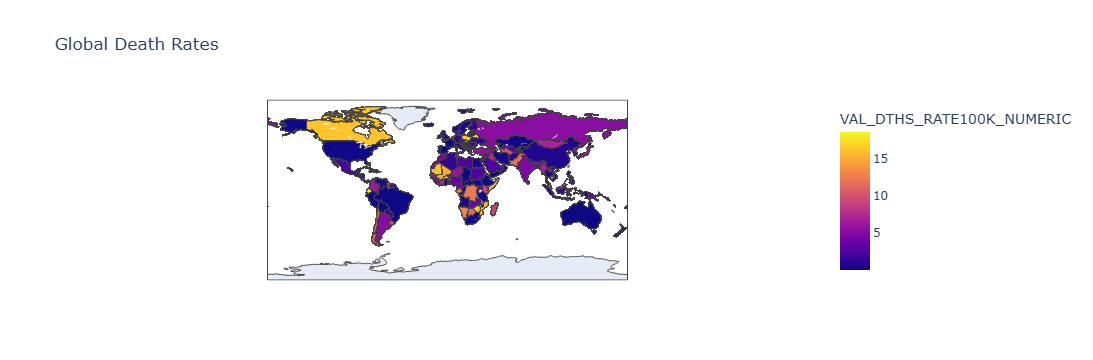

ValueError: Found input variables with inconsistent numbers of samples: [183, 24522]

In [25]:
# 6.1 Custom country profile generator
def country_profile(country_code):
    """Generate detailed health profile"""
    profile = df[df['DIM_COUNTRY_CODE'] == country_code]
    # Analysis logic...
    return profile_stats

# 6.2 Interactive visualization
import plotly.express as px
fig = px.choropleth(df, locations='DIM_COUNTRY_CODE', 
                    color='VAL_DTHS_RATE100K_NUMERIC',
                    hover_name='DIM_GHECAUSE_TITLE',
                    title='Global Death Rates')
fig.show()

# 6.3 Advanced clustering evaluation
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(scaled_data, clusters)
print(f"Davies-Bouldin Score: {db_score:.3f}")

In [26]:
df.to_csv(r"C:\Users\Administrator\Documents\cleaned_data.csv", index=False)
